In [1]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import os

In [2]:
#Source - https://covidtracking.com/data
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data used to verify accuracy 

#Get Covid data for all of U.S.
json_url = "https://api.covidtracking.com/v1/states/daily.json"

#Create dictionary to read from
us_daily_dict = requests.get(json_url).json()

In [3]:
#Create data frame from dictionary
us_daily = pd.DataFrame(us_daily_dict)

# Filter Kansas and New Jersey

In [4]:
#Filter Kansas and New Jersey
ks_nj_daily = pd.DataFrame(us_daily[["date", "state", "positive", "negative", "positiveIncrease", "negativeIncrease", "death", "deathIncrease", 
                  "totalTestResultsIncrease", "totalTestResults", "recovered"]])
ks_nj_daily = ks_nj_daily.loc[(ks_nj_daily["state"] == "KS") | (ks_nj_daily["state"] == "NJ") ]

# Calculate Active Cases and Percent of Positive Results

In [5]:
#Fill percentage column
ks_nj_daily["Percentage"] = ks_nj_daily["positiveIncrease"]/ks_nj_daily["totalTestResultsIncrease"]

#Fill NaN fields to be zero for readability
ks_nj_daily[["Percentage", "death", "recovered", "positive", "negative"]] = ks_nj_daily[["Percentage", "death", "recovered", "positive", "negative"]].fillna(0)

#Add active cases column
ks_nj_daily["Active Cases"] = ks_nj_daily["positive"] - (ks_nj_daily["recovered"] + ks_nj_daily["death"])

#Format percentage
ks_nj_daily["Percentage"] = ks_nj_daily["Percentage"].astype(float).map("{:.2%}".format)

#Format date
ks_nj_daily["date"] = pd.to_datetime(ks_nj_daily["date"], format='%Y%m%d')

#Write to csv file
ks_nj_daily.to_csv('Resources/ks_nj_daily.csv')

# Create DataFrames for Monthly Plotting

In [6]:
#Filter for March data
ks_march = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-03-01") & (ks_nj_daily["date"] <= "2020-03-31") & (ks_nj_daily["state"] == "KS") ,:]
nj_march = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-03-01") & (ks_nj_daily["date"] <= "2020-03-31") & (ks_nj_daily["state"] == "NJ") ,:]
nj_march = nj_march.loc[(nj_march["positive"] > 0),:]

#Sort values for charting
ks_march = ks_march.sort_values("date", ascending = True)
nj_march = nj_march.sort_values("date", ascending = True)

#Filter April data
ks_april = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-04-01") & (ks_nj_daily["date"] <= "2020-04-30") & (ks_nj_daily["state"] == "KS") ,:]
nj_april = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-04-01") & (ks_nj_daily["date"] <= "2020-04-30") & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_april = ks_april.sort_values("date", ascending = True)
nj_april = nj_april.sort_values("date", ascending = True)

#Filter May data
ks_may = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-05-01") & (ks_nj_daily["date"] <= "2020-05-31") & (ks_nj_daily["state"] == "KS") ,:]
nj_may = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-05-01") & (ks_nj_daily["date"] <= "2020-05-31") & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_may = ks_may.sort_values("date", ascending = True)
nj_may = nj_may.sort_values("date", ascending = True)

#Filter June data
ks_june = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-06-01") & (ks_nj_daily["date"] <= "2020-06-30") & (ks_nj_daily["state"] == "KS") ,:]
nj_june = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-06-01") & (ks_nj_daily["date"] <= "2020-06-30") & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_june = ks_june.sort_values("date", ascending = True)
nj_june = nj_june.sort_values("date", ascending = True)

#Filter July data
ks_july = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-07-01") & (ks_nj_daily["date"] <= "2020-07-31") & (ks_nj_daily["state"] == "KS") ,:]
nj_july = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-07-01") & (ks_nj_daily["date"] <= "2020-07-31") & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_july = ks_july.sort_values("date", ascending = True)
nj_july = nj_july.sort_values("date", ascending = True)

#Filter August data
ks_aug = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-08-01") & (ks_nj_daily["date"] <= "2020-08-31") & (ks_nj_daily["state"] == "KS") ,:]
nj_aug = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-08-01") & (ks_nj_daily["date"] <= "2020-08-31") & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_aug = ks_aug.sort_values("date", ascending = True)
nj_aug = nj_aug.sort_values("date", ascending = True)

# Calculate Maximum Active Cases for Each State by Month

In [7]:
#Get active cases for each month in Kansas
act_ks_march = ks_march["Active Cases"].max()
act_ks_april = ks_april["Active Cases"].max()
act_ks_may = ks_may["Active Cases"].max()
act_ks_june = ks_june["Active Cases"].max()
act_ks_july = ks_july["Active Cases"].max()

#Create dataframe
ks_actcases_by_month = pd.DataFrame({"March":[act_ks_march], "April":[act_ks_april], "May":[act_ks_may], "June":[act_ks_june],
                                    "July": act_ks_july})
ks_actcases_by_month_final = ks_actcases_by_month.transpose()
ks_actcases_by_month_final.reset_index(inplace=True)
ks_actcases_by_month_final.columns = ["Month", "Kansas"]

In [8]:
#Get active cases for each month in New Jersey
act_nj_march = nj_march["Active Cases"].max()
act_nj_april = nj_april["Active Cases"].max()
act_nj_may = nj_may["Active Cases"].max()
act_nj_june = nj_june["Active Cases"].max()
act_nj_july = nj_july["Active Cases"].max()

nj_actcases_by_month = pd.DataFrame({"March":[act_nj_march], "April":[act_nj_april], "May":[act_nj_may], "June":[act_nj_june],
                                    "July": act_nj_july})
nj_actcases_by_month_final = nj_actcases_by_month.transpose()
nj_actcases_by_month_final.reset_index(inplace=True)
nj_actcases_by_month_final.columns = ["Month", "New Jersey"]

# Create DataFrame for Active Cases & Cumulative for Each State by Month

In [9]:
#Plot active cases vs cumulative together as line graph

#Get cumulative as of last day of each month for Kansas
tot_nj_march = nj_march["positive"].max()
tot_nj_april = nj_april["positive"].max()
tot_nj_may = nj_may["positive"].max()
tot_nj_june = nj_june["positive"].max()
tot_nj_july = nj_july["positive"].max()

#Get cumulative as of last day of each month for New Jersey
tot_ks_march = ks_march["positive"].max()
tot_ks_april = ks_april["positive"].max()
tot_ks_may = ks_may["positive"].max()
tot_ks_june = ks_june["positive"].max()
tot_ks_july = ks_july["positive"].max()

#Create DataFrame for Kansas
ks_totcases_by_month = pd.DataFrame({"March":[tot_ks_march], "April":[tot_ks_april], "May":[tot_ks_may], "June":[tot_ks_june],
                                    "July": tot_ks_july})
ks_totcases_by_month_final = ks_totcases_by_month.transpose()
ks_totcases_by_month_final.reset_index(inplace=True)
ks_totcases_by_month_final.columns = ["Month", "Kansas"]

#Create DataFrame for New Jersey
nj_totcases_by_month = pd.DataFrame({"March":[tot_nj_march], "April":[tot_nj_april], "May":[tot_nj_may], "June":[tot_nj_june],
                                    "July": tot_nj_july})
nj_totcases_by_month_final = nj_totcases_by_month.transpose()
nj_totcases_by_month_final.reset_index(inplace=True)
nj_totcases_by_month_final.columns = ["Month", "New Jersey"]

#Merge cumulative with active for Kansas
ks_merged = pd.merge(ks_actcases_by_month_final, ks_totcases_by_month_final, on = "Month")
ks_merged = ks_merged.rename(columns={"Kansas_x": "KS Active", "Kansas_y": "KS Cumulative"})

#Merge cumulative with active for New Jersey
nj_merged = pd.merge(nj_actcases_by_month_final, nj_totcases_by_month_final, on = "Month")
nj_merged = nj_merged.rename(columns={"New Jersey_x": "NJ Active", "New Jersey_y": "NJ Cumulative"})

# Plot Number of Active Cases vs Cumulative for Kansas

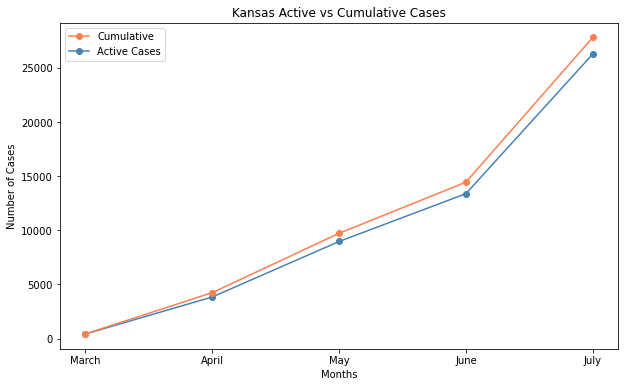

In [10]:
#Plot active cases vs cumulative together as line graph
ks_act = ks_merged["KS Active"]
ks_tot = ks_merged["KS Cumulative"]
months = ["March", "April", "May", "June", "July"]

plt.figure(figsize = (10, 6))
ks_act_plot, = plt.plot(months, ks_act, marker = "o", color = "steelblue", label = "Active Cases")
ks_tot_plot, = plt.plot(months, ks_tot, marker = "o", color = "coral", label = "Cumulative")
plt.xlabel("Months")
plt.ylabel("Number of Cases")
plt.title("Kansas Active vs Cumulative Cases")
plt.legend(handles=[ks_tot_plot, ks_act_plot], loc = "best")

#Save image
plt.savefig("Images/ks_act_vs_cum_monthly.png")
plt.show()

# Plot Active Cases vs Cumulative for New Jersey

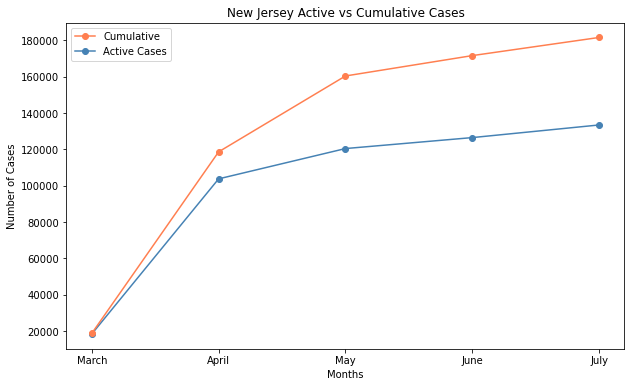

In [11]:
#Plot active cases vs cumulative together as line graph
nj_act = nj_merged["NJ Active"]
nj_tot = nj_merged["NJ Cumulative"]
months = ["March", "April", "May", "June", "July"]

plt.figure(figsize = (10, 6))
nj_act_plot, = plt.plot(months, nj_act, marker = "o", color = "steelblue", label = "Active Cases")
nj_tot_plot, = plt.plot(months, nj_tot, marker = "o", color = "coral", label = "Cumulative")
plt.xlabel("Months")
plt.ylabel("Number of Cases")
plt.title("New Jersey Active vs Cumulative Cases")
plt.legend(handles=[nj_tot_plot, nj_act_plot], loc = "best")

#Save image
plt.savefig("Images/nj_act_vs_cum_monthly.png")
plt.show()

# Calculate Percent of Population for Active & Cumulative Cases

In [12]:
#Read filtered census CSV for Kansas and New Jersey
pop_df = pd.read_csv("Resources/ks_nj_populations.csv")
pop_df.head(5)

,Unnamed: 0,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS
0,17,Kansas,2913314,2213064,76.0
1,31,New Jersey,8882190,6943612,78.2


In [21]:
#Create DataFrame for Kansas
ks_merged["Population"] = "2913314"
ks_merged["Population"] = pd.to_numeric(ks_merged["Population"])
ks_merged["Percent Active"] = (ks_merged["KS Active"]/ks_merged["Population"])*100
ks_merged["Percent Cumulative"] = (ks_merged["KS Cumulative"]/ks_merged["Population"])*100
ks_merged["Pct Active of Cumulative"] = (ks_merged["KS Active"]/ks_merged["KS Cumulative"])*100
ks_merged["Pct of Resolved Cases"] = 100 - ks_merged["Pct Active of Cumulative"]

#Format percentage
# ks_merged["Percent Active"] = ks_merged["Percent Active"].astype(float).map("{:.2%}".format)
# ks_merged["Percent Cumulative"] = ks_merged["Percent Cumulative"].astype(float).map("{:.2%}".format)
# ks_merged["Pct Active of Cumulative"] = ks_merged["Pct Active of Cumulative"].astype(float).map("{:.2%}".format)
# ks_merged["Population"] = ks_merged["Population"].astype(float).map("{:,.0f}".format)
# ks_merged["KS Cumulative"] = ks_merged["KS Cumulative"].astype(float).map("{:,.0f}".format)
# ks_merged["KS Active"] = ks_merged["KS Active"].astype(float).map("{:,.0f}".format)

ks_merged

,Month,KS Active,KS Cumulative,Population,Percent Active,Percent Cumulative,Pct Active of Cumulative,Pct of Resolved Cases
0,March,419.0,428.0,2913314,0.014382,0.014691,97.897196,2.102804
1,April,3837.0,4238.0,2913314,0.131706,0.145470,90.537990,9.462010
2,May,8964.0,9719.0,2913314,0.307691,0.333606,92.231711,7.768289
3,June,13379.0,14443.0,2913314,0.459236,0.495758,92.633109,7.366891
4,July,26276.0,27812.0,2913314,0.901928,0.954652,94.477204,5.522796


In [22]:
#Create DataFrame for New Jersey
nj_merged["Population"] = "8882190"
nj_merged["Population"] = pd.to_numeric(nj_merged["Population"])
nj_merged["Percent Active"] = (nj_merged["NJ Active"]/nj_merged["Population"])*100
nj_merged["Percent Cumulative"] = (nj_merged["NJ Cumulative"]/nj_merged["Population"])*100
nj_merged["Pct Active of Cumulative"] = (nj_merged["NJ Active"]/nj_merged["NJ Cumulative"])*100
nj_merged["Pct of Resolved Cases"] = 100 - nj_merged["Pct Active of Cumulative"]

#Format percentage
# nj_merged["Percent Active"] = nj_merged["Percent Active"].astype(float).map("{:.2%}".format)
# nj_merged["Percent Cumulative"] = nj_merged["Percent Cumulative"].astype(float).map("{:.2%}".format)
# nj_merged["Pct Active of Cumulative"] = nj_merged["Pct Active of Cumulative"].astype(float).map("{:.2%}".format)
# nj_merged["Population"] = nj_merged["Population"].astype(float).map("{:,.0f}".format)
# nj_merged["NJ Cumulative"] = nj_merged["NJ Cumulative"].astype(float).map("{:,.0f}".format)
# nj_merged["NJ Active"] = nj_merged["NJ Active"].astype(float).map("{:,.0f}".format)
# nj_merged["Pct of Resolved Cases"] = nj_merged["Pct of Resolved Cases"].astype(float).map("{:.2%}".format)

nj_merged

,Month,NJ Active,NJ Cumulative,Population,Percent Active,Percent Cumulative,Pct Active of Cumulative,Pct of Resolved Cases
0,March,18331.0,18696.0,8882190,0.206379,0.210489,98.047711,1.952289
1,April,103779.0,118652.0,8882190,1.168394,1.335842,87.465024,12.534976
2,May,120467.0,160445.0,8882190,1.356276,1.806368,75.083050,24.916950
3,June,126504.0,171667.0,8882190,1.424243,1.932710,73.691507,26.308493
4,July,133460.0,181660.0,8882190,1.502557,2.045216,73.466916,26.533084


# Plot Percentages of Active for Kansas & New Jersey

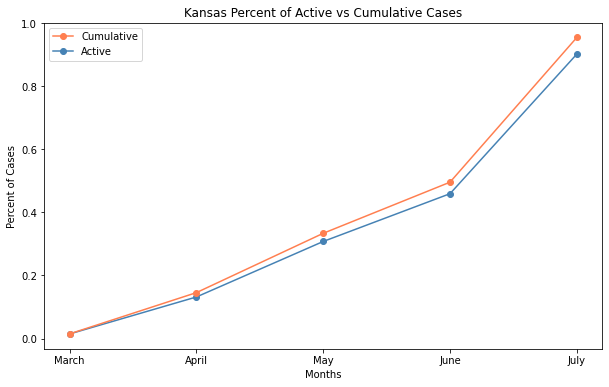

In [23]:
#Plot active cases vs cumulative together as line graph
ks_pc_act = ks_merged["Percent Active"]
ks_pct_tot = ks_merged["Percent Cumulative"]
months = ["March", "April", "May", "June", "July"]

plt.figure(figsize = (10, 6))
ks_pct_act_plot, = plt.plot(months, ks_pc_act, marker = "o", color = "steelblue", label = "Active")
ks_pct_tot_plot, = plt.plot(months, ks_pct_tot, marker = "o", color = "coral", label = "Cumulative")
plt.xlabel("Months")
plt.ylabel("Percent of Cases")
plt.title("Kansas Percent of Active vs Cumulative Cases")
plt.legend(handles=[ks_pct_tot_plot, ks_pct_act_plot], loc = "best")
#vals = ax.get_yticks()
#plt.yticks('{:.2%}'.format())
#plt.yticks("%.2f%%")

#Save image
plt.savefig("Images/ks_pct_act_vs_cum_monthly.png")
plt.show()

# Plot Percentages for New Jersey

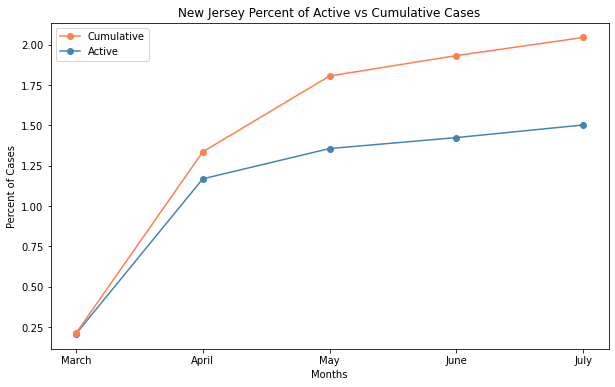

In [24]:
#Plot active cases vs cumulative together as line graph
nj_pc_act = nj_merged["Percent Active"]
nj_pct_tot = nj_merged["Percent Cumulative"]
months = ["March", "April", "May", "June", "July"]

plt.figure(figsize = (10, 6))
nj_pc_act_plot, = plt.plot(months, nj_pc_act, marker = "o", color = "steelblue", label = "Active")
nj_pct_tot_plot, = plt.plot(months, nj_pct_tot, marker = "o", color = "coral", label = "Cumulative")
plt.xlabel("Months")
plt.ylabel("Percent of Cases")
plt.title("New Jersey Percent of Active vs Cumulative Cases")
plt.legend(handles=[nj_pct_tot_plot, nj_pc_act_plot], loc = "best")

#Save image
plt.savefig("Images/nj_pct_act_vs_cum_monthly.png")
plt.show()

# Plot Percent of Active vs Cumulative for Kansas & New Jersey

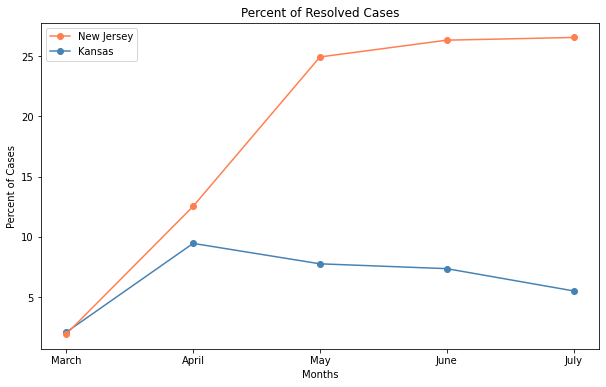

In [25]:
#Plot active cases vs cumulative together as line graph
ks_act_cum = ks_merged["Pct of Resolved Cases"]
nj_act_cum = nj_merged["Pct of Resolved Cases"]
months = ["March", "April", "May", "June", "July"]

plt.figure(figsize = (10, 6))
ks_act_cum_plot, = plt.plot(months, ks_act_cum, marker = "o", color = "steelblue", label = "Kansas")
nj_act_cum_plot, = plt.plot(months, nj_act_cum, marker = "o", color = "coral", label = "New Jersey")
plt.xlabel("Months")
plt.ylabel("Percent of Cases")
plt.title("Percent of Resolved Cases")
plt.legend(handles=[nj_act_cum_plot, ks_act_cum_plot], loc = "best")

#Save image
plt.savefig("Images/resolved_monthly.png")
plt.show()

# Plot Percent of Active Cases vs Cumulative for Kansas

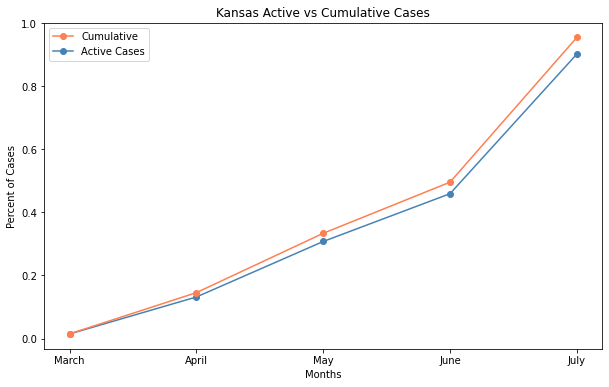

In [26]:
#Plot active cases vs cumulative together as line graph
ks_pct_act = ks_merged["Percent Active"]
ks_pct_tot = ks_merged["Percent Cumulative"]
months = ["March", "April", "May", "June", "July"]

plt.figure(figsize = (10, 6))
ks_pct_act_plot, = plt.plot(months, ks_pct_act, marker = "o", color = "steelblue", label = "Active Cases")
ks_pct_tot_plot, = plt.plot(months, ks_pct_tot, marker = "o", color = "coral", label = "Cumulative")
plt.xlabel("Months")
plt.ylabel("Percent of Cases")
plt.title("Kansas Active vs Cumulative Cases")
plt.legend(handles=[ks_pct_tot_plot, ks_pct_act_plot], loc = "best")

#Save image
plt.savefig("Images/ks_pct_act_vs_cum_monthly.png")
plt.show()

# Plot Percent of Active Cases vs Cumulative for New Jersey

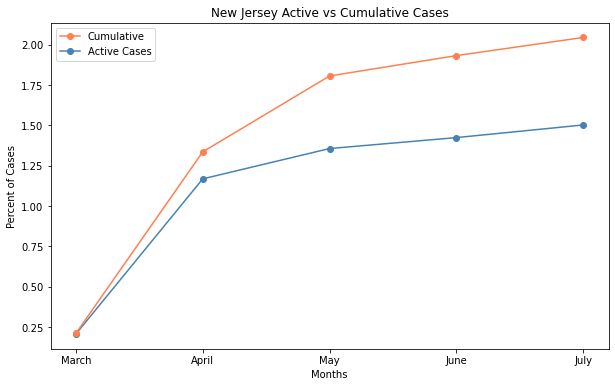

In [27]:
#Plot active cases vs cumulative together as line graph
nj_pct_act = nj_merged["Percent Active"]
nj_pct_tot = nj_merged["Percent Cumulative"]
months = ["March", "April", "May", "June", "July"]

plt.figure(figsize = (10, 6))
nj_pct_act_plot, = plt.plot(months, nj_pct_act, marker = "o", color = "steelblue", label = "Active Cases")
nj_pct_tot_plot, = plt.plot(months, nj_pct_tot, marker = "o", color = "coral", label = "Cumulative")
plt.xlabel("Months")
plt.ylabel("Percent of Cases")
plt.title("New Jersey Active vs Cumulative Cases")
plt.legend(handles=[nj_pct_tot_plot, nj_pct_act_plot], loc = "best")

#Save image
plt.savefig("Images/nj_pct_act_vs_cum_monthly.png")
plt.show()